In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_act = pd.read_csv("dailyActivity_merged.csv",index_col=0)
df_act = df_act[df_act['TotalSteps'] != 0]
numeric_columns = df_act.select_dtypes(include=np.number).columns

# Define the threshold as the 75th percentile value
threshold_percentile = 95

# Apply thresholding to all numeric columns
for column in numeric_columns:
    threshold = np.percentile(df_act[column], threshold_percentile)
    df_act[column] = np.where(df_act[column] > threshold, threshold, df_act[column])

In [3]:
df_act.head()

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,,
1503960366,4/12/2016,13162.0,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25.0,13.0,328.0,728.0,1985.0
1503960366,4/13/2016,10735.0,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21.0,19.0,217.0,776.0,1797.0
1503960366,4/14/2016,10460.0,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30.0,11.0,181.0,1218.0,1776.0
1503960366,4/15/2016,9762.0,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29.0,34.0,209.0,726.0,1745.0
1503960366,4/16/2016,12669.0,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36.0,10.0,221.0,773.0,1863.0


In [4]:
df_act.loc[1503960366]

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,,
1503960366,4/12/2016,13162.0,8.500,8.500,0.0,1.88,0.55,6.06,0.0,25.0,13.0,328.0,728.0,1985.0
1503960366,4/13/2016,10735.0,6.970,6.970,0.0,1.57,0.69,4.71,0.0,21.0,19.0,217.0,776.0,1797.0
1503960366,4/14/2016,10460.0,6.740,6.740,0.0,2.44,0.40,3.91,0.0,30.0,11.0,181.0,1218.0,1776.0
1503960366,4/15/2016,9762.0,6.280,6.280,0.0,2.14,1.26,2.83,0.0,29.0,34.0,209.0,726.0,1745.0
1503960366,4/16/2016,12669.0,8.160,8.160,0.0,2.71,0.41,5.04,0.0,36.0,10.0,221.0,773.0,1863.0
1503960366,4/17/2016,9705.0,6.480,6.480,0.0,3.19,0.78,2.51,0.0,38.0,20.0,164.0,539.0,1728.0
1503960366,4/18/2016,13019.0,8.590,8.590,0.0,3.25,0.64,4.71,0.0,42.0,16.0,233.0,1149.0,1921.0
1503960366,4/19/2016,15506.0,9.880,9.880,0.0,3.53,1.32,5.03,0.0,50.0,31.0,264.0,775.0,2035.0
1503960366,4/20/2016,10544.0,6.680,6.680,0.0,1.96,0.48,4.24,0.0,28.0,12.0,205.0,818.0,1786.0


In [5]:
print("Missing values in df_activity:")
print(df_act.isnull().sum())

Missing values in df_activity:
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [6]:
df_act["ActivityDate"] = pd.to_datetime(df_act["ActivityDate"], format="%m/%d/%Y")
df_act["Weekday"] = df_act["ActivityDate"].dt.day_name()

In [7]:
df_act["TotalMins"] = df_act["VeryActiveMinutes"] + df_act["FairlyActiveMinutes"] + df_act["LightlyActiveMinutes"] + df_act["SedentaryMinutes"]
df_act["Totalhours"] = round(df_act["TotalMins"] / 60)
df_act["TotalActiveMins"] = df_act["VeryActiveMinutes"] + df_act["FairlyActiveMinutes"] + df_act["LightlyActiveMinutes"]
df_act["TotalActivehours"] = round(df_act["TotalActiveMins"] / 60)
# Calculate activity preference based on the proportion of each activity type
df_act['ActivityPreference'] = df_act['VeryActiveMinutes'] / df_act['TotalActiveMins']

# Define thresholds for different activity preferences
light_threshold = 0.3
moderate_threshold = 0.5

# Classify activity preferences
df_act['ActivityPreference'] = pd.cut(df_act['ActivityPreference'],
                                           bins=[-1, light_threshold, moderate_threshold, 1],
                                           labels=['Light', 'Moderate', 'High'])


In [8]:
# Drop the specified columns from df_activity
columns_to_drop = ['LoggedActivitiesDistance', 'SedentaryActiveDistance']
df_act.drop(columns=columns_to_drop, inplace=True)

print("Columns in df_activity after dropping specified columns:", df_act.columns)

Columns in df_activity after dropping specified columns: Index(['ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
       'SedentaryMinutes', 'Calories', 'Weekday', 'TotalMins', 'Totalhours',
       'TotalActiveMins', 'TotalActivehours', 'ActivityPreference'],
      dtype='object')


In [9]:
df_act.head()

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday,TotalMins,Totalhours,TotalActiveMins,TotalActivehours,ActivityPreference
Id,,,,,,,,,,,,,,,,,,
1503960366,2016-04-12,13162.0,8.50,8.50,1.88,0.55,6.06,25.0,13.0,328.0,728.0,1985.0,Tuesday,1094.0,18.0,366.0,6.0,Light
1503960366,2016-04-13,10735.0,6.97,6.97,1.57,0.69,4.71,21.0,19.0,217.0,776.0,1797.0,Wednesday,1033.0,17.0,257.0,4.0,Light
1503960366,2016-04-14,10460.0,6.74,6.74,2.44,0.40,3.91,30.0,11.0,181.0,1218.0,1776.0,Thursday,1440.0,24.0,222.0,4.0,Light
1503960366,2016-04-15,9762.0,6.28,6.28,2.14,1.26,2.83,29.0,34.0,209.0,726.0,1745.0,Friday,998.0,17.0,272.0,5.0,Light
1503960366,2016-04-16,12669.0,8.16,8.16,2.71,0.41,5.04,36.0,10.0,221.0,773.0,1863.0,Saturday,1040.0,17.0,267.0,4.0,Light


In [10]:
df_act.describe()

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMins,Totalhours,TotalActiveMins,TotalActivehours
count,863,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,2016-04-26 02:16:49.501738240,8109.863268,5.769659,5.756368,1.430239,0.548192,3.581089,21.577057,13.410197,207.800232,953.035458,2344.332329,1195.822943,19.939745,242.787486,4.019699
min,2016-04-12 00:00:00,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,2.000000,0.000000,0.000000,0.000000
25%,2016-04-18 00:00:00,4923.000000,3.370000,3.370000,0.000000,0.000000,2.345000,0.000000,0.000000,146.500000,721.500000,1855.500000,981.000000,16.000000,182.500000,3.000000
50%,2016-04-26 00:00:00,8053.000000,5.590000,5.590000,0.410000,0.310000,3.580000,7.000000,8.000000,208.000000,1021.000000,2220.000000,1340.000000,22.000000,255.000000,4.000000
75%,2016-05-03 00:00:00,11092.500000,7.900000,7.880000,2.275000,0.865000,4.895000,35.000000,21.000000,272.000000,1189.000000,2832.000000,1440.000000,24.000000,318.000000,5.000000
max,2016-05-12 00:00:00,15912.500000,11.999000,11.999000,6.874000,2.160000,6.645000,96.000000,53.000000,370.900000,1354.900000,3678.700000,1440.000000,24.000000,493.900000,8.000000
std,NaN,4205.784078,3.110676,3.093913,1.991237,0.659884,1.726024,28.832757,15.770203,92.012417,276.034495,662.574824,262.974731,4.397962,99.648974,1.690243


In [11]:
unique_ids_activity = df_act.index.unique()
num_unique_ids_activity = len(unique_ids_activity)

print("Number of unique IDs in df_activity:", num_unique_ids_activity)

Number of unique IDs in df_activity: 33


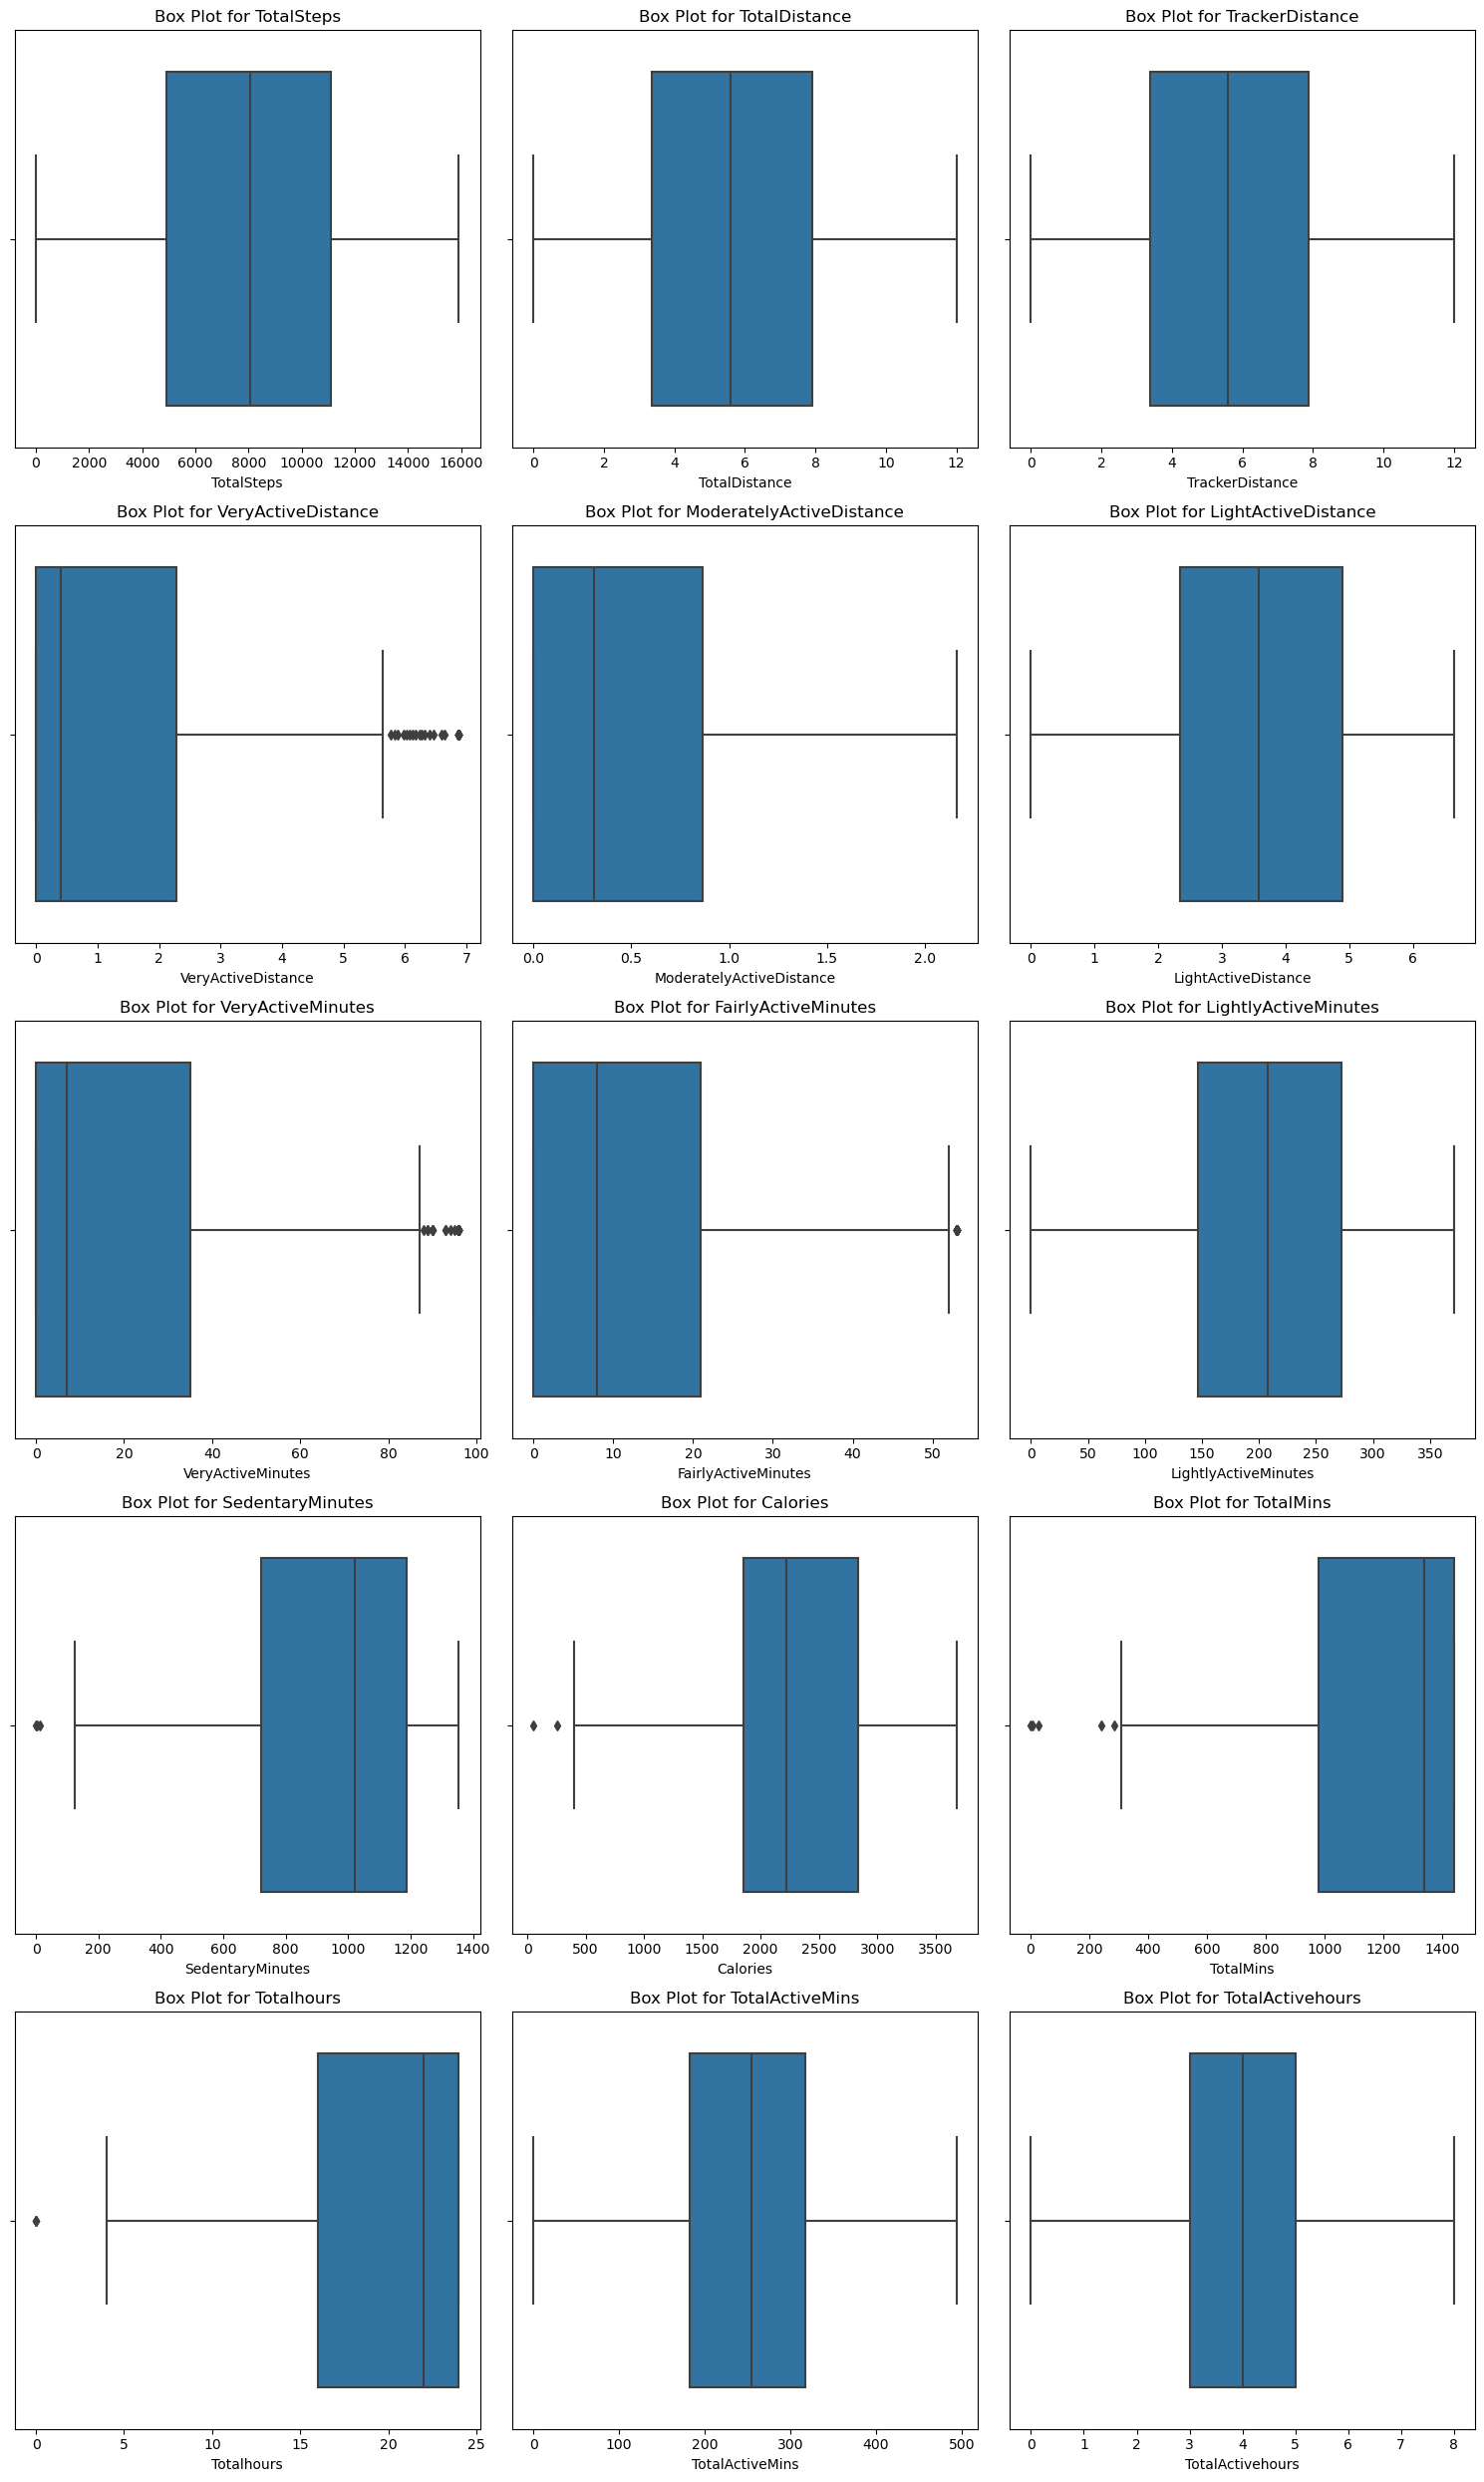

In [12]:
# Get the column names excluding 'ActivityDate' and 'ID'
activity_columns = [col for col in df_act.columns if col not in ['ActivityDate', 'ID', 'Weekday', 'ActivityPreference']]

# Set up subplots based on the number of columns
num_columns = len(activity_columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))

# Create subplots using a for loop
for i, column in enumerate(activity_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=df_act[column])
    plt.title(f'Box Plot for {column}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

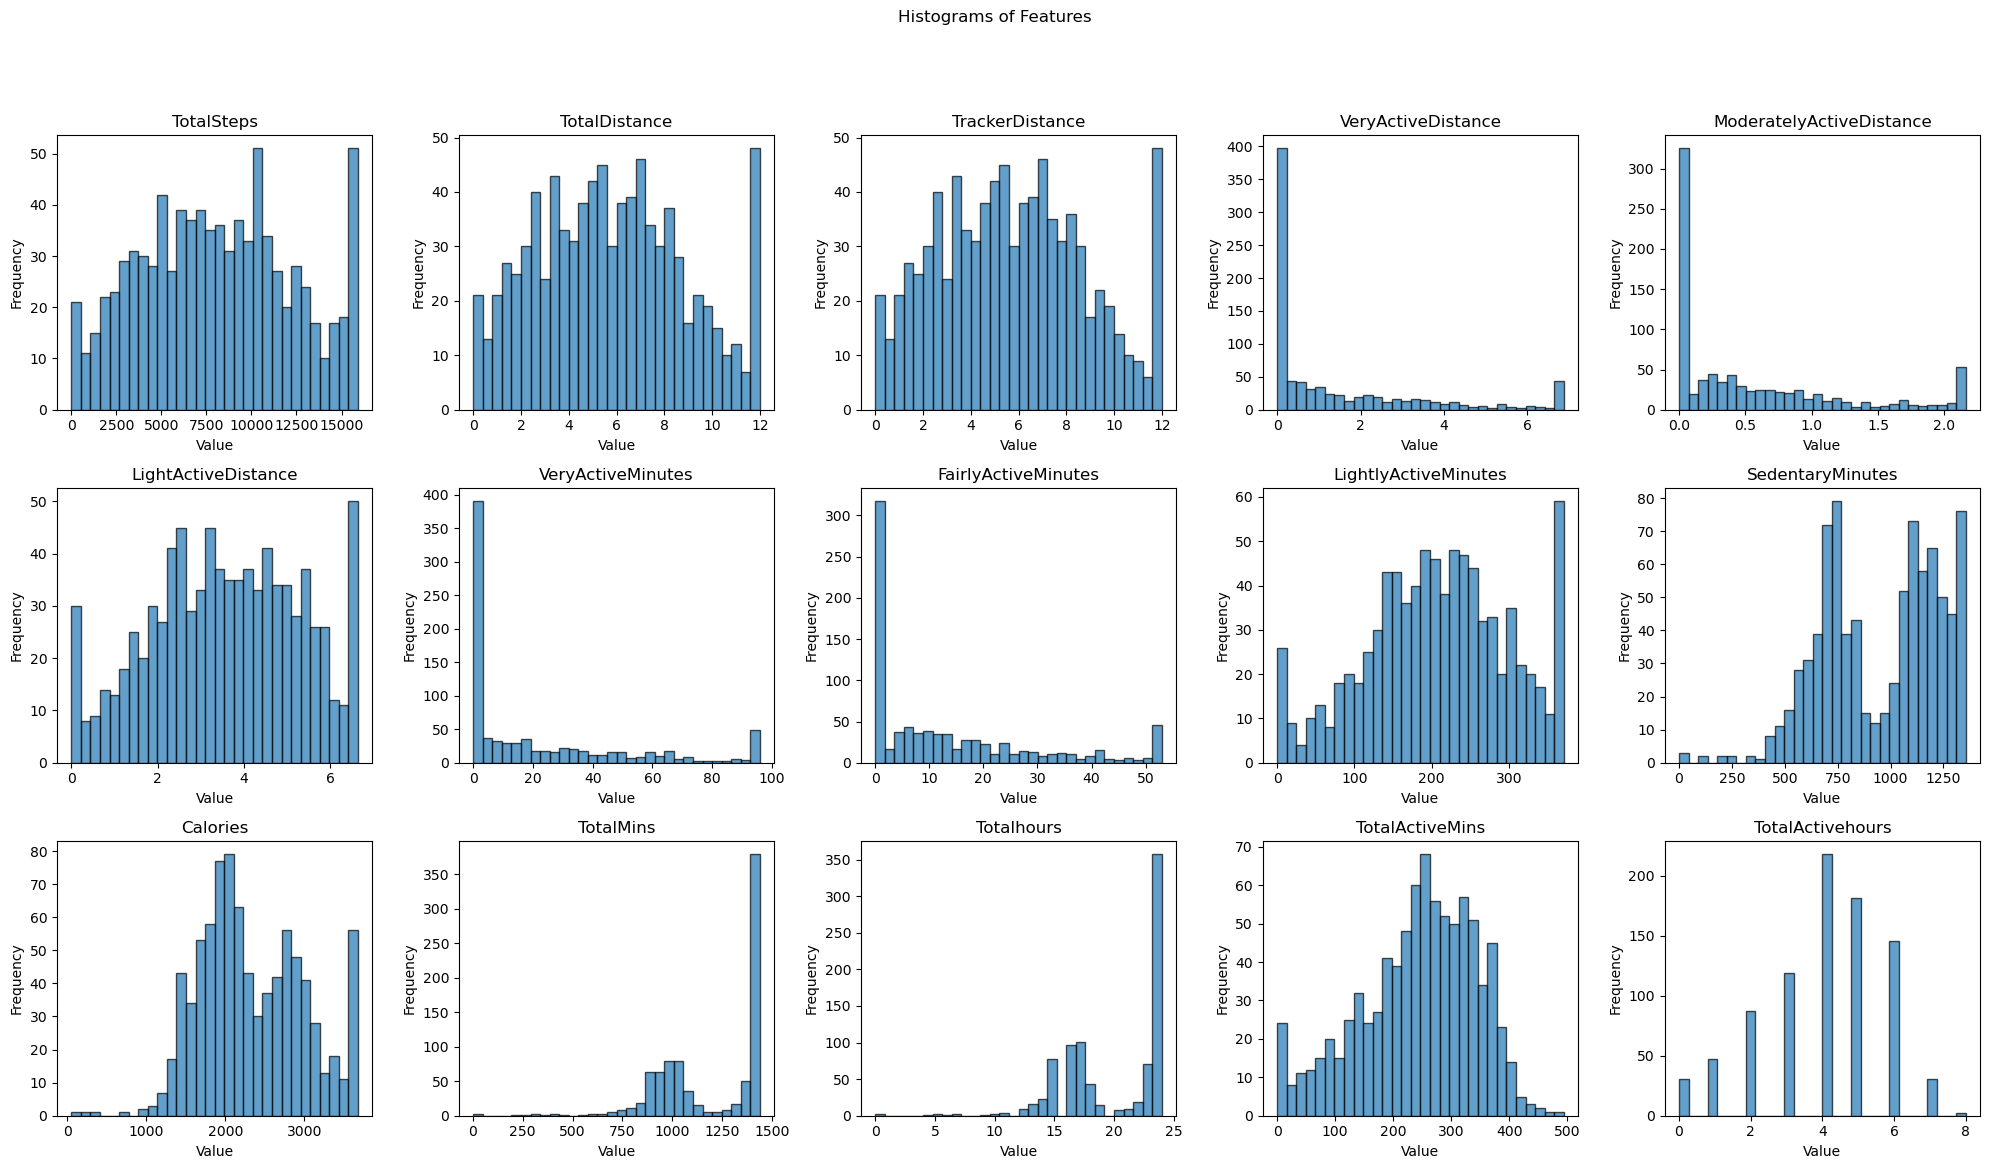

In [13]:
fig_before, axes_before = plt.subplots(3, 5, figsize=(20, 12))
fig_before.suptitle("Histograms of Features", y=1, fontsize=12)

# Flatten the axes for easy iteration
axes_before = axes_before.flatten()

# Plot histograms for each original feature
for i, column in enumerate(activity_columns):  # Starting from the 4th column (skipping 'id', 'date', 'day_of_the_week')
    axes_before[i].hist(df_act[column], bins=30, edgecolor='black', alpha=0.7)
    axes_before[i].set_title(column)
    axes_before[i].set_xlabel('Value')
    axes_before[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [14]:
df_act_scaled = df_act.copy(deep=True)

In [15]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
numeric_columns_act = df_act.select_dtypes(include='number').columns

df_act_scaled[numeric_columns_act] = standard_scaler.fit_transform(df_act[numeric_columns_act])

In [16]:
df_act_melt = pd.melt(df_act_scaled.iloc[:, :-1], id_vars=['ActivityDate', 'Weekday'], var_name='variable', value_name='value')

df_act_melt

,ActivityDate,Weekday,variable,value
0,2016-04-12,Tuesday,TotalSteps,1.201932
1,2016-04-13,Wednesday,TotalSteps,0.624535
2,2016-04-14,Thursday,TotalSteps,0.559111
3,2016-04-15,Friday,TotalSteps,0.393053
4,2016-04-16,Saturday,TotalSteps,1.084644
...,...,...,...,...
12940,2016-05-08,Sunday,TotalActivehours,-0.011661
12941,2016-05-09,Monday,TotalActivehours,0.580313
12942,2016-05-10,Tuesday,TotalActivehours,-0.011661
12943,2016-05-11,Wednesday,TotalActivehours,0.580313


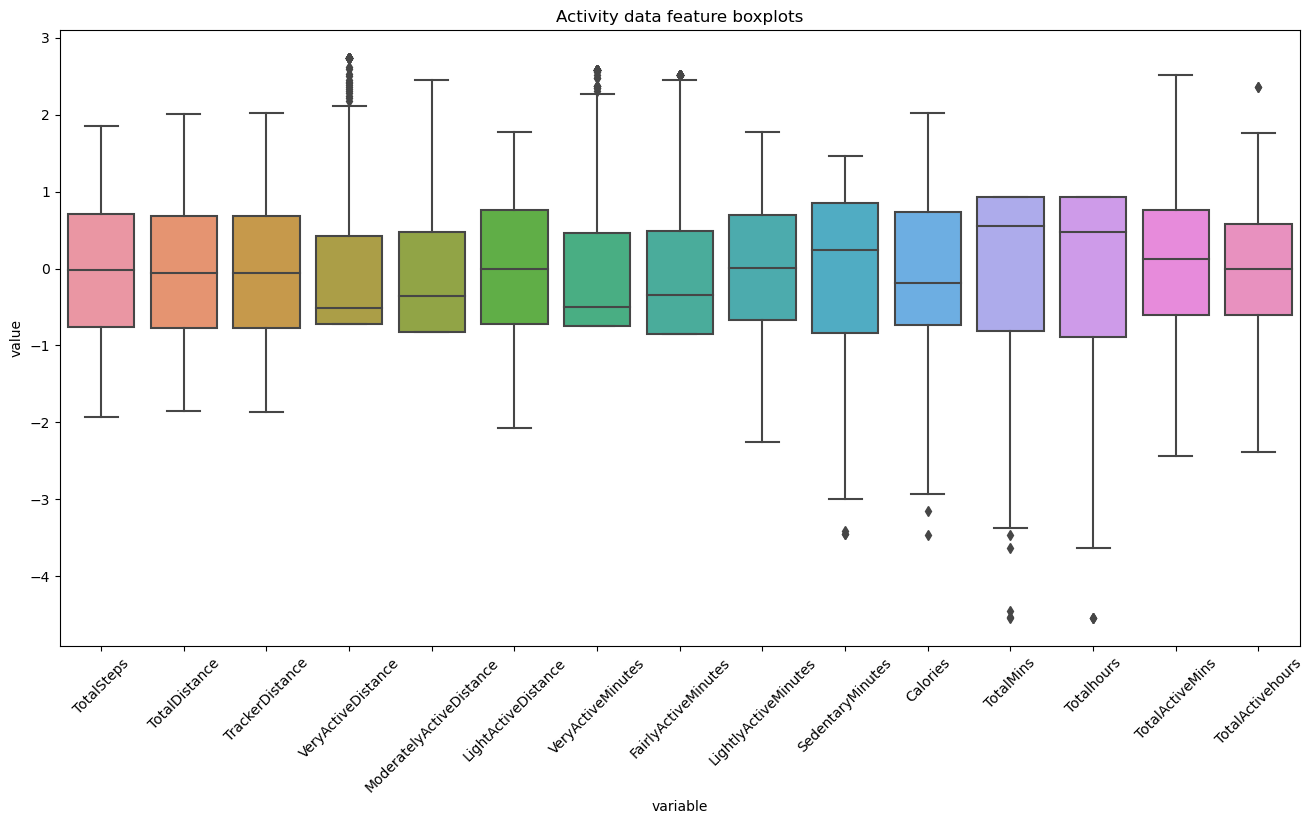

In [17]:
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x="variable", y="value", data=df_act_melt)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(title='Activity data feature boxplots')

plt.show()

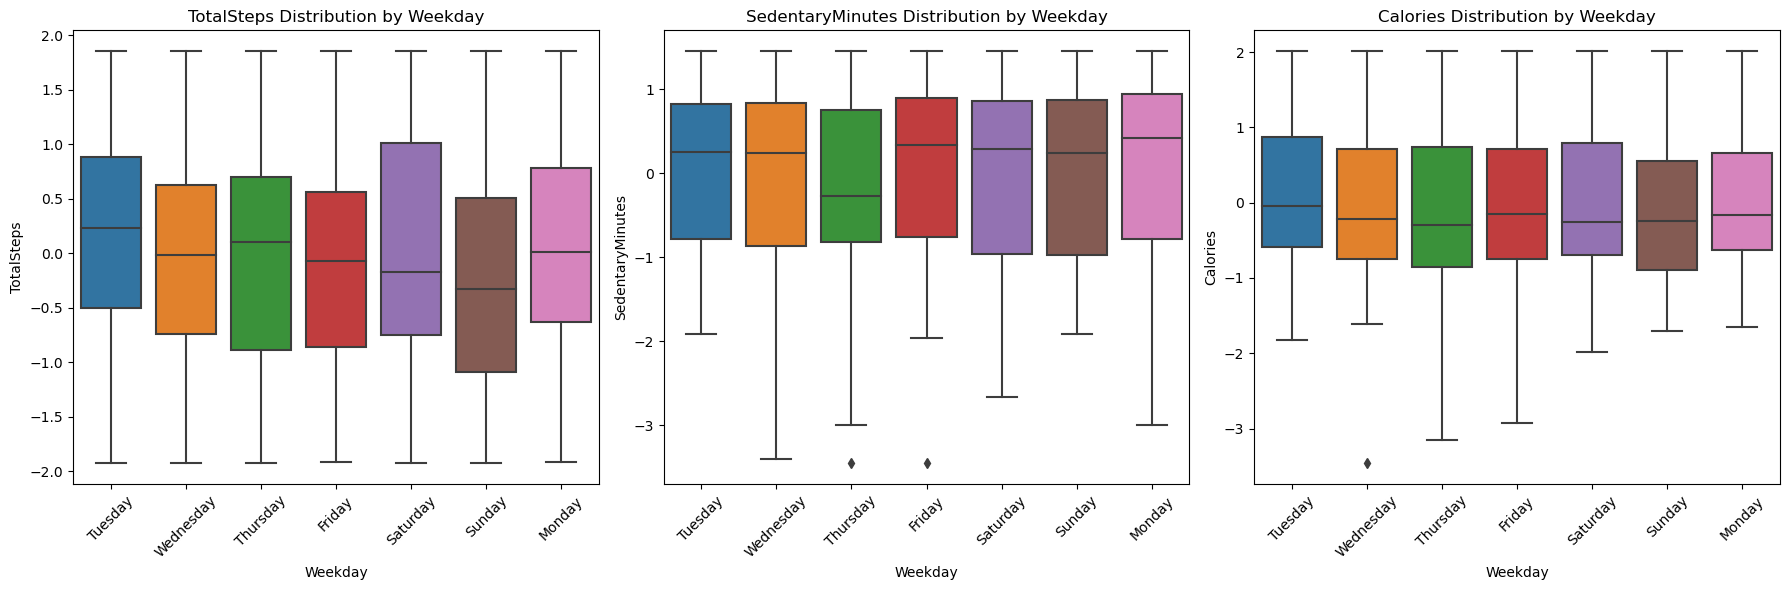

In [18]:
# Plotting TotalSteps distribution
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Weekday', y='TotalSteps', data=df_act_scaled)
plt.title('TotalSteps Distribution by Weekday')
plt.xticks(rotation=45)

# Plotting SedentaryMinutes distribution
plt.subplot(1, 3, 2)
sns.boxplot(x='Weekday', y='SedentaryMinutes', data=df_act_scaled)
plt.title('SedentaryMinutes Distribution by Weekday')
plt.xticks(rotation=45)

# Plotting Calories distribution
plt.subplot(1, 3, 3)
sns.boxplot(x='Weekday', y='Calories', data=df_act_scaled)
plt.title('Calories Distribution by Weekday')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [19]:
# set darkness of each bar according to values
def bar_color(bar, N:int):
    """
    Args:
        bar: sns.barplot object
        N: Number of bars in the barplot object
    """
    palette = sns.cubehelix_palette(N, start=.30, rot=-.20)
    
    height = {}
    
    for patch in bar.patches:
        # get each bar's value
        height[patch] = patch.get_height()
    
    # sort by value
    sorted_height = dict(sorted(height.items(), key=lambda item: item[1]))

    count = 0
    for i in sorted_height.keys():
        # apply darkness
        i.set_facecolor(palette[count])
        count += 1

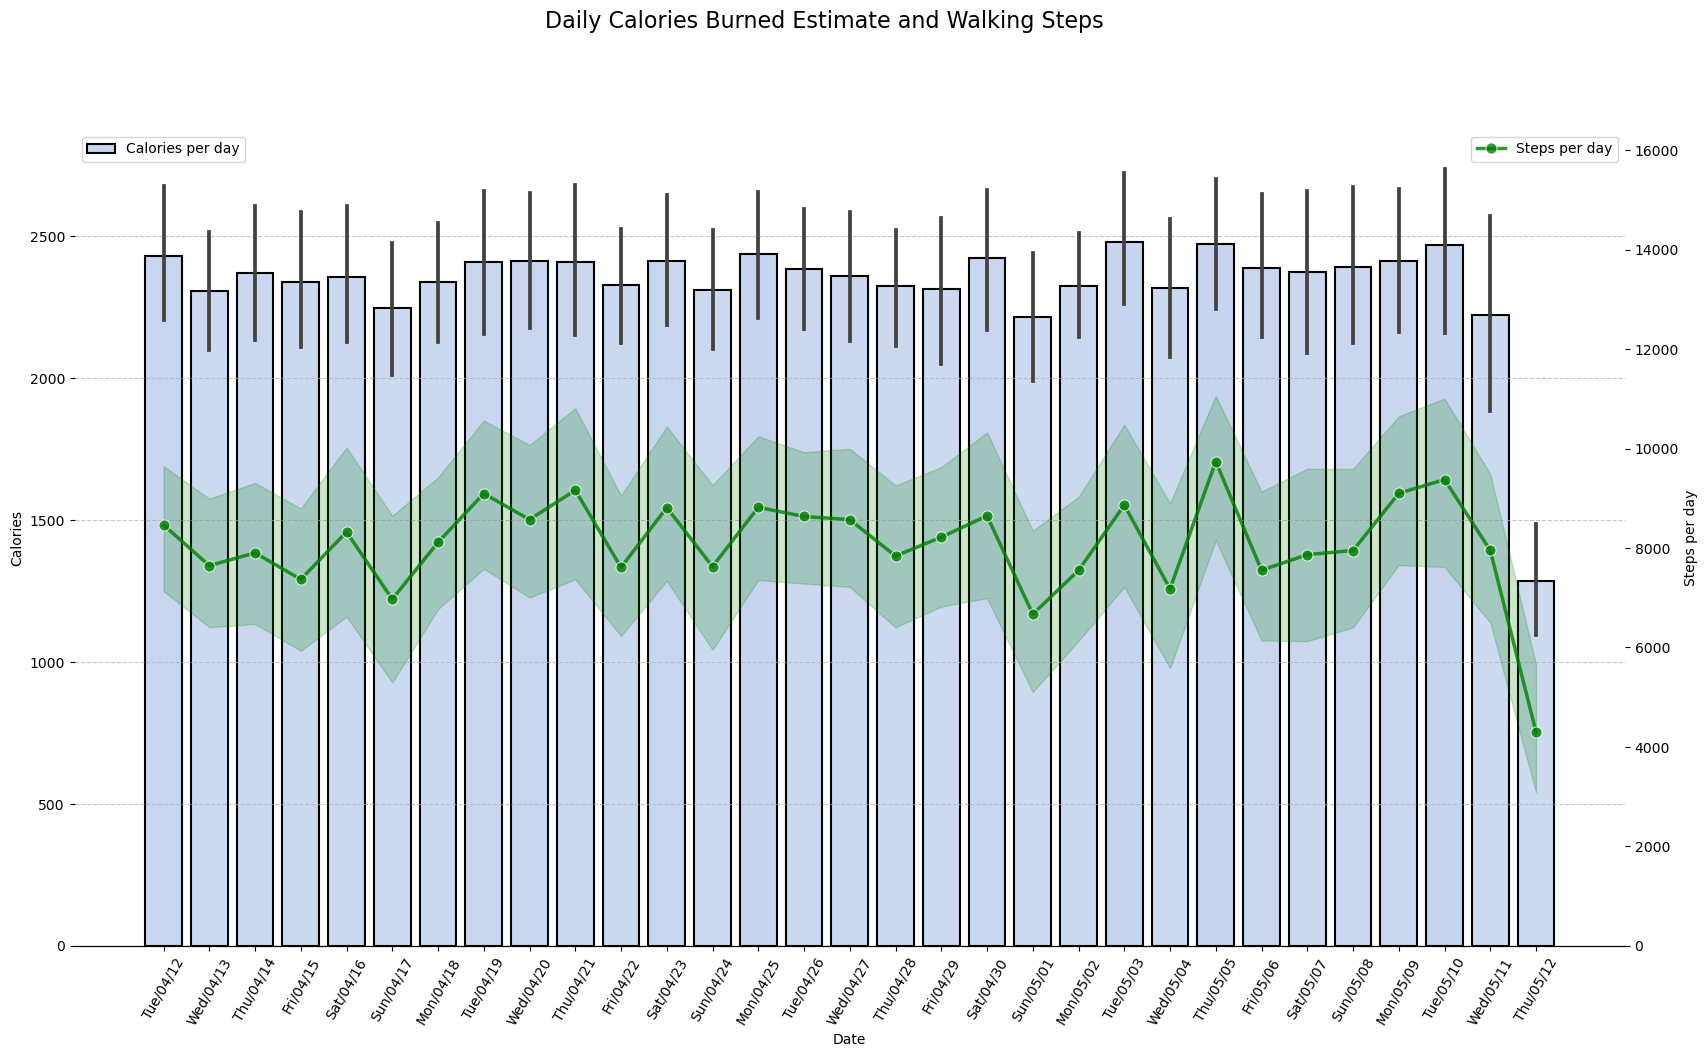

In [20]:
# define the canvas and axes
fig, ax = plt.subplots(figsize=(20, 12), sharex=True)

# barplot example
bar = sns.barplot(ax=ax,
                  data=df_act,
                  x=df_act['ActivityDate'].dt.strftime("%a/%m/%d"),
                  y="Calories",
                  label="Calories per day",
                  color='skyblue',
                  edgecolor='black',  # add edge color for better visibility
                  linewidth=1.5)

# set bar color according to their heights
bar_color(bar, df_act.shape[0])

ax.set_xlabel("Date")  # set name of x-axis

# get the twin y-axis
ax_twin = ax.twinx()

# Lineplot for Steps
sns.lineplot(ax=ax_twin,
             data=df_act,
             x=df_act['ActivityDate'].dt.strftime("%a/%m/%d"),
             y="TotalSteps",
             marker="o",  # change marker style
             markersize=8,  # reduce marker size
             linewidth=2.5,  # increase line width
             color='green',  # change line color
             alpha=0.8,  # adjust transparency
             label="Steps per day")

# Set the y label of ax_twin
ax_twin.set_ylabel("Steps per day")

# Set proper ylim range of ax_twin
ax_twin.set_ylim(0, df_act["TotalSteps"].max() + 500)

# define the global title
fig.suptitle("Daily Calories Burned Estimate and Walking Steps", fontsize=16)

# format the figure
sns.despine(top=True, right=True, left=True)

# add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# format xticks
fig.autofmt_xdate(rotation=60, ha='center')

# show legend with adjusted location
ax.legend(loc='upper left')
ax_twin.legend(loc='upper right')

# show the plotting
plt.show()


In [21]:
df_act_scaled.head()

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday,TotalMins,Totalhours,TotalActiveMins,TotalActivehours,ActivityPreference
Id,,,,,,,,,,,,,,,,,,
1503960366,2016-04-12,1.201932,0.878241,0.887298,0.226001,0.002741,1.437030,0.118786,-0.026026,1.307100,-0.815717,-0.542642,Tuesday,-0.387421,-0.441311,1.237182,1.172287,Light
1503960366,2016-04-13,0.624535,0.386101,0.392492,0.070229,0.215023,0.654432,-0.020026,0.354659,0.100042,-0.641725,-0.826548,Wednesday,-0.619517,-0.668821,0.142709,-0.011661,Light
1503960366,2016-04-14,0.559111,0.312120,0.318109,0.507397,-0.224704,0.190670,0.292300,-0.152921,-0.291436,0.960453,-0.858261,Thursday,0.929058,0.923748,-0.208728,-0.011661,Light
1503960366,2016-04-15,0.393053,0.164156,0.169344,0.356649,1.079312,-0.435408,0.257598,1.306371,0.013047,-0.822966,-0.905075,Friday,-0.752687,-0.668821,0.293324,0.580313,Light
1503960366,2016-04-16,1.084644,0.768877,0.777341,0.643069,-0.209541,0.845734,0.500518,-0.216368,0.143540,-0.652599,-0.726879,Saturday,-0.592883,-0.668821,0.243119,-0.011661,Light


In [22]:
df_act_scaled_without_weekday = df_act_scaled.drop('Weekday', axis=1)

In [23]:
df_act_scaled_without_weekday.head()

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMins,Totalhours,TotalActiveMins,TotalActivehours,ActivityPreference
Id,,,,,,,,,,,,,,,,,
1503960366,2016-04-12,1.201932,0.878241,0.887298,0.226001,0.002741,1.437030,0.118786,-0.026026,1.307100,-0.815717,-0.542642,-0.387421,-0.441311,1.237182,1.172287,Light
1503960366,2016-04-13,0.624535,0.386101,0.392492,0.070229,0.215023,0.654432,-0.020026,0.354659,0.100042,-0.641725,-0.826548,-0.619517,-0.668821,0.142709,-0.011661,Light
1503960366,2016-04-14,0.559111,0.312120,0.318109,0.507397,-0.224704,0.190670,0.292300,-0.152921,-0.291436,0.960453,-0.858261,0.929058,0.923748,-0.208728,-0.011661,Light
1503960366,2016-04-15,0.393053,0.164156,0.169344,0.356649,1.079312,-0.435408,0.257598,1.306371,0.013047,-0.822966,-0.905075,-0.752687,-0.668821,0.293324,0.580313,Light
1503960366,2016-04-16,1.084644,0.768877,0.777341,0.643069,-0.209541,0.845734,0.500518,-0.216368,0.143540,-0.652599,-0.726879,-0.592883,-0.668821,0.243119,-0.011661,Light


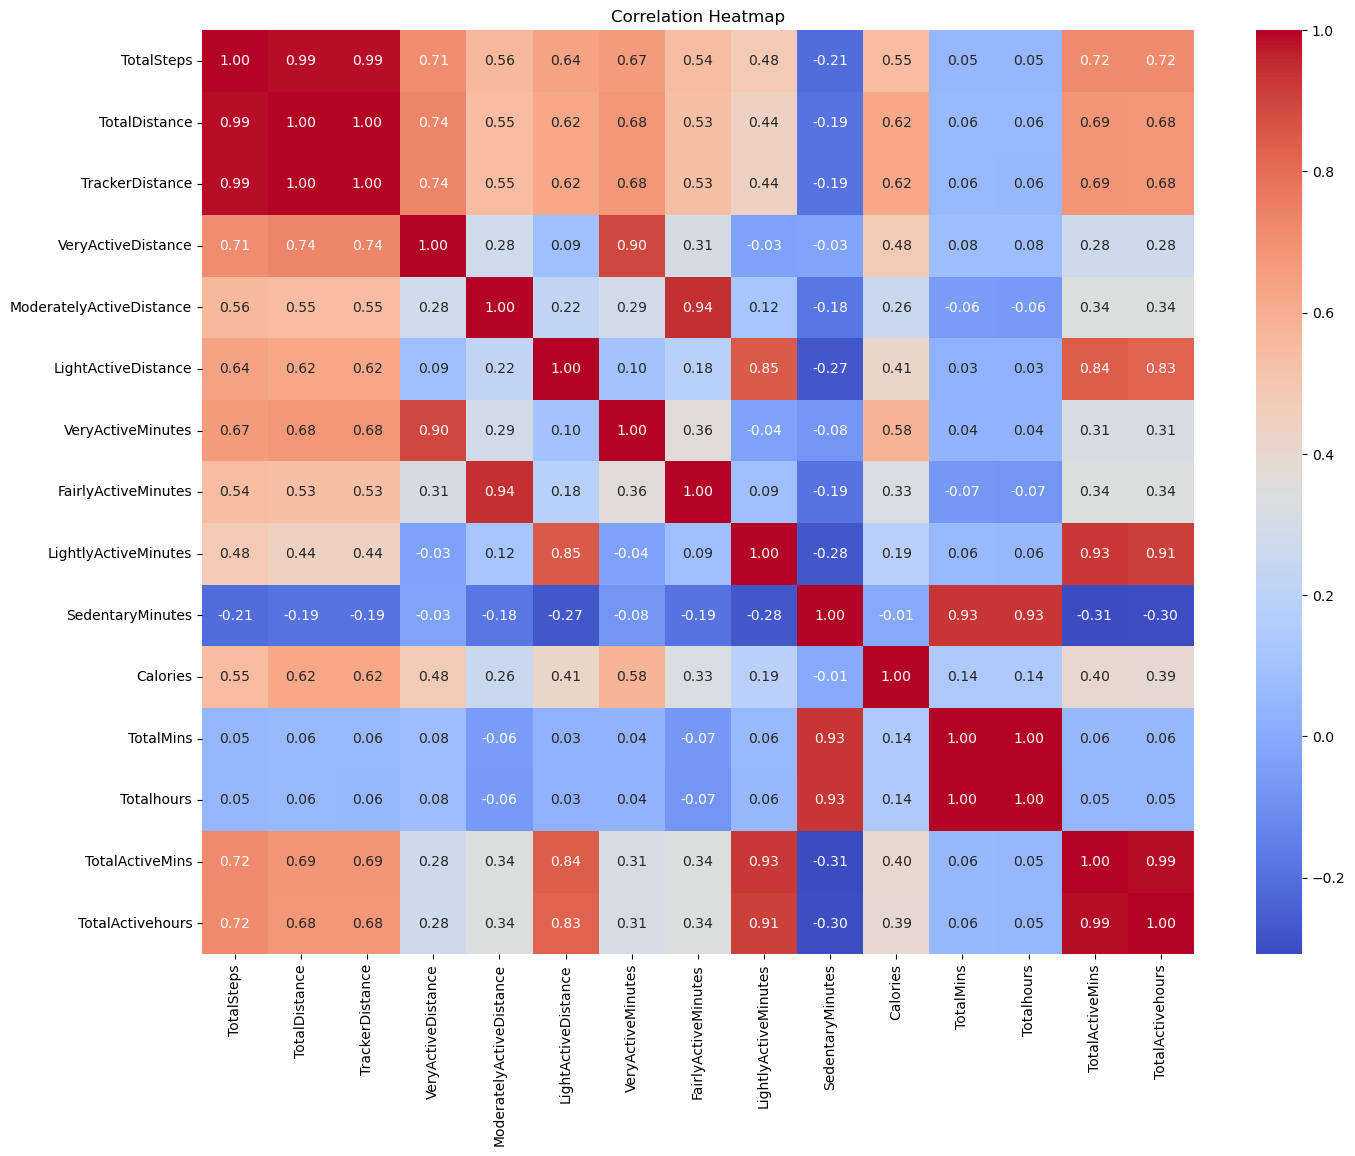

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_weekly_weight_change with columns 'Id', 'Week', and 'WeightChange'
# Also, assuming df_activity contains the activity data with 'Id' as the common column

#df_merged = pd.merge(df_weight_scaled, df_act_scaled, left_index=True, right_index=True, how='inner')

# Select only numeric columns
numeric_columns = df_act.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a heatmap with 'viridis' colormap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
np.random.seed(42)

# Randomly choose 3 unique indices from the DataFrame's index
random_ids = np.random.choice(df_act_scaled.index.unique(), 3, replace=False)

In [26]:
random_ids

array([8792009665, 4388161847, 7086361926])

In [27]:
desired_row_df = df_act_scaled.loc[random_ids[1]]

In [28]:
desired_row_df

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday,TotalMins,Totalhours,TotalActiveMins,TotalActivehours,ActivityPreference
Id,,,,,,,,,,,,,,,,,,
4388161847,2016-04-12,0.478699,0.646646,0.654448,-0.718683,-0.831223,-2.075966,-0.748786,-0.850843,-2.259703,1.456693,0.922193,Tuesday,0.605265,0.696238,-2.437840,-2.379558,NaN
4388161847,2016-04-13,0.685915,0.862158,0.871128,-0.688534,0.124045,0.173279,-0.714083,0.037422,-0.628543,1.167069,1.129082,Wednesday,0.929058,0.923748,-0.781068,-0.603635,Light
4388161847,2016-04-14,0.179175,0.337853,0.343981,-0.653359,0.791216,1.181961,-0.401757,1.369819,0.121791,-0.029127,0.987129,Thursday,0.050137,0.013709,0.212996,-0.011661,Light
4388161847,2016-04-15,0.154195,0.308903,0.314875,-0.718683,-0.831223,1.776156,-0.748786,-0.850843,0.991743,-0.420610,1.089818,Friday,-0.227617,-0.213801,0.564432,0.580313,Light
4388161847,2016-04-16,-0.363963,-0.228269,-0.225207,-0.613160,-0.224704,0.503709,-0.540569,-0.279816,0.491520,-1.247072,1.100389,Saturday,-1.213074,-1.123841,0.253160,-0.011661,Light
4388161847,2016-04-17,-0.820742,-0.704326,-0.703844,-0.718683,-0.831223,-0.000631,-0.748786,-0.850843,-0.073948,-0.841091,0.343810,Sunday,-1.041856,-1.123841,-0.419590,-0.603635,Light
4388161847,2016-04-18,0.689721,1.071237,1.081340,1.070187,-0.224704,0.903704,0.188192,-0.343263,0.339279,0.231861,1.403927,Monday,0.362135,0.468728,0.313406,0.580313,Light
4388161847,2016-04-19,0.492735,0.662729,0.670618,-0.030269,0.215023,1.268917,-0.054728,0.164317,0.448023,-0.902713,1.012801,Tuesday,-0.786931,-0.896331,0.423858,0.580313,Light
4388161847,2016-04-20,0.581236,0.756010,0.764405,-0.165942,1.776809,0.990659,-0.089431,1.813951,0.219660,-0.931711,1.115491,Wednesday,-0.802150,-0.896331,0.464022,0.580313,Light


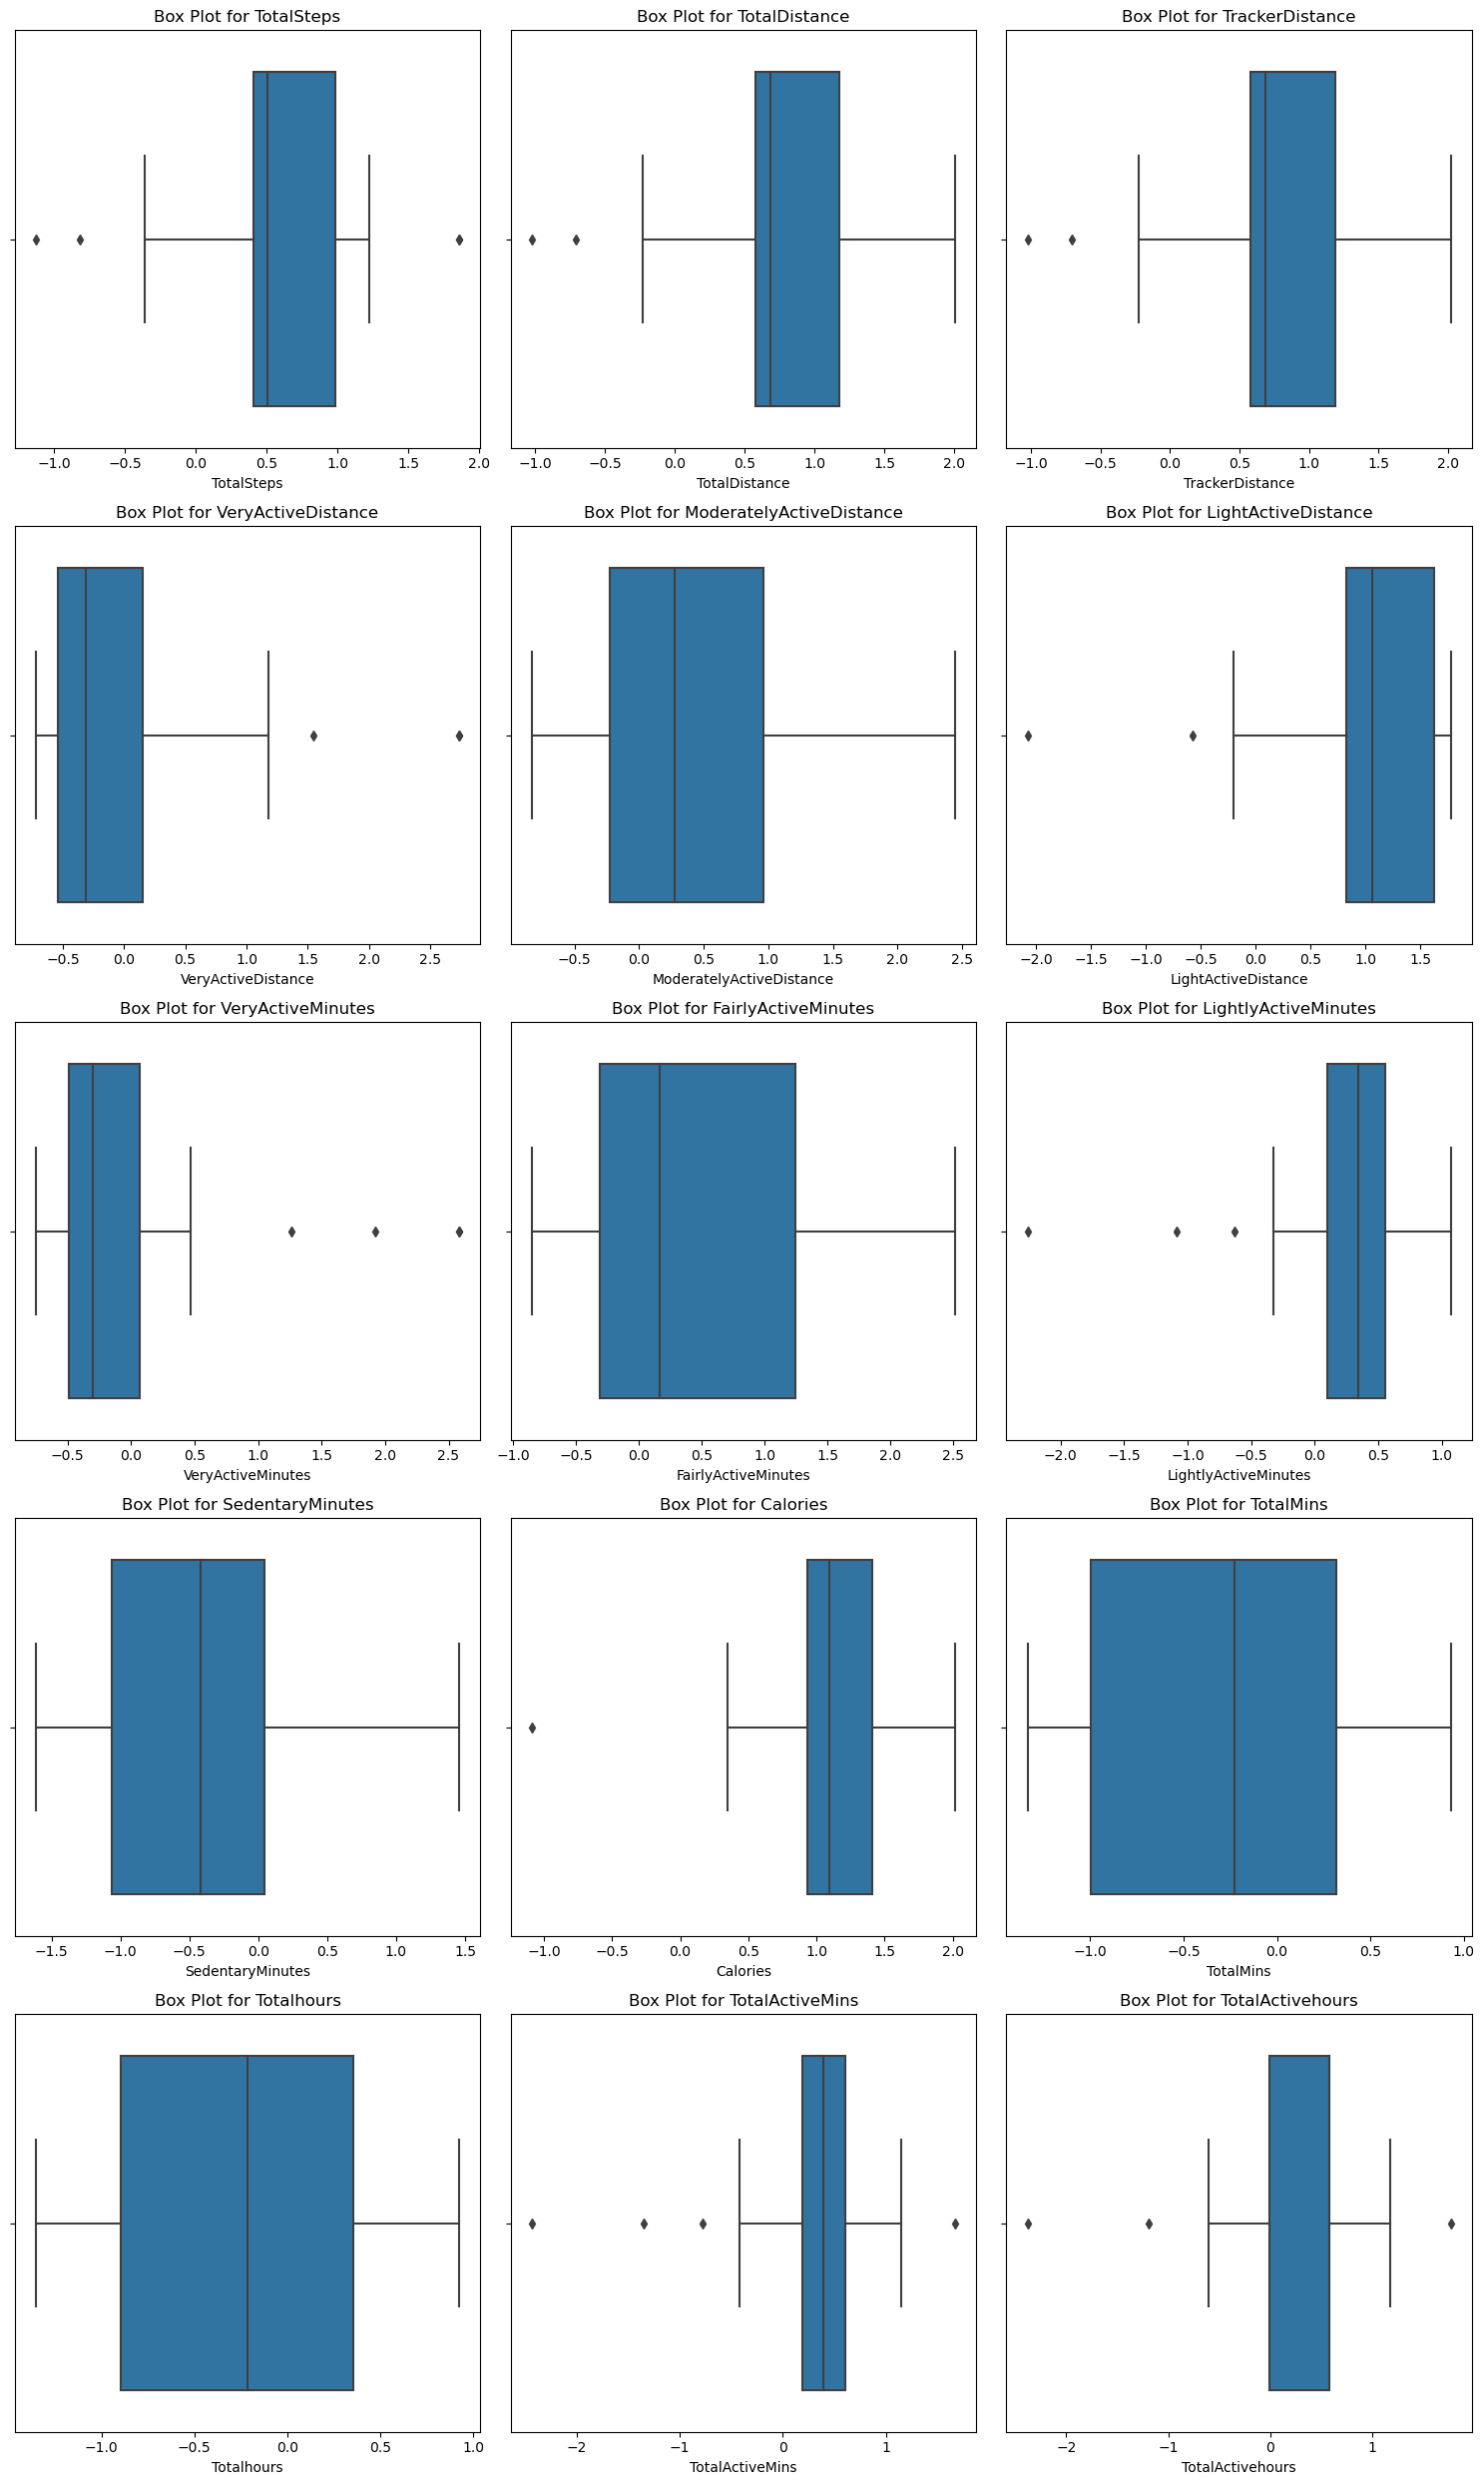

In [29]:
# Get the column names excluding 'ActivityDate' and 'ID'
activity_columns = [col for col in desired_row_df.columns if col not in ['ActivityDate', 'ID', 'Weekday', 'ActivityPreference']]

# Set up subplots based on the number of columns
num_columns = len(activity_columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))

# Create subplots using a for loop
for i, column in enumerate(activity_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=desired_row_df[column])
    plt.title(f'Box Plot for {column}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Tuesday'),
  Text(1, 0, 'Wednesday'),
  Text(2, 0, 'Thursday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Saturday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

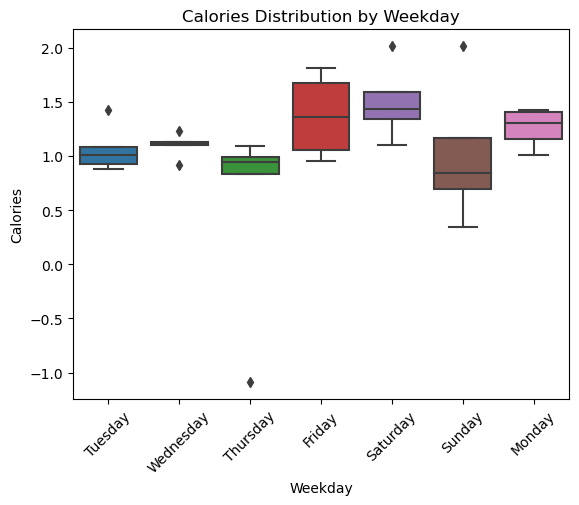

In [30]:
sns.boxplot(x='Weekday', y='Calories', data=desired_row_df)
plt.title('Calories Distribution by Weekday')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Tuesday'),
  Text(1, 0, 'Wednesday'),
  Text(2, 0, 'Thursday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Saturday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

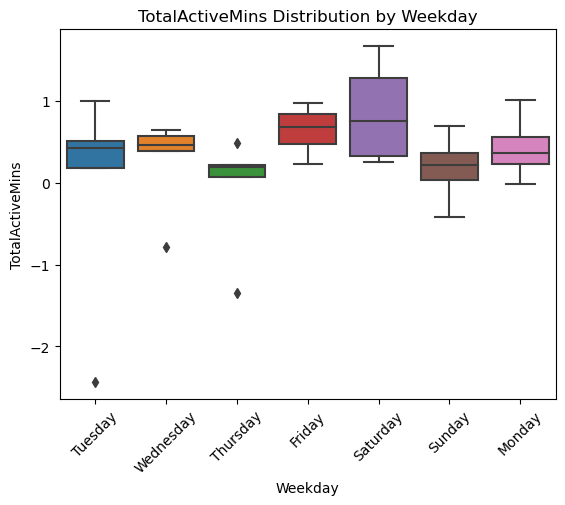

In [31]:
sns.boxplot(x='Weekday', y='TotalActiveMins', data=desired_row_df)
plt.title('TotalActiveMins Distribution by Weekday')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Tuesday'),
  Text(1, 0, 'Wednesday'),
  Text(2, 0, 'Thursday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Saturday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

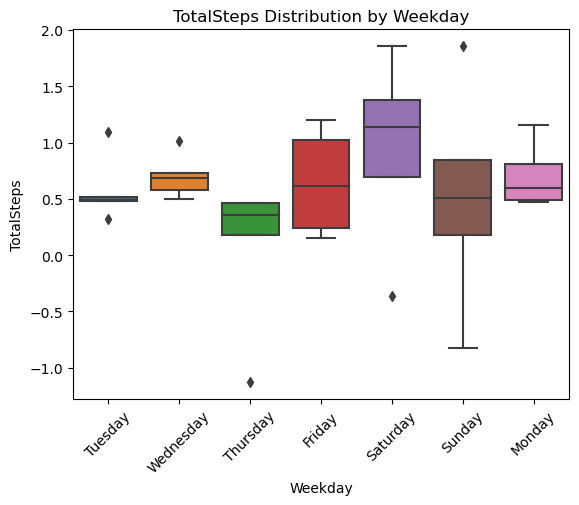

In [32]:
sns.boxplot(x='Weekday', y='TotalSteps', data=desired_row_df)
plt.title('TotalSteps Distribution by Weekday')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Tuesday'),
  Text(1, 0, 'Wednesday'),
  Text(2, 0, 'Thursday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Saturday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

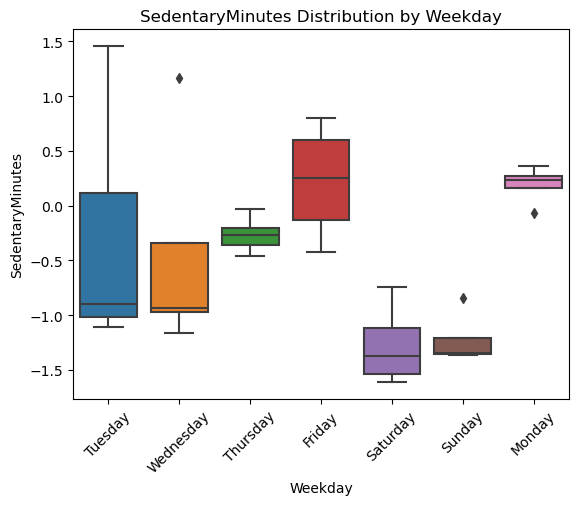

In [33]:
sns.boxplot(x='Weekday', y='SedentaryMinutes', data=desired_row_df)
plt.title('SedentaryMinutes Distribution by Weekday')
plt.xticks(rotation=45)

In [34]:
melted_desired_row = pd.melt(desired_row_df, id_vars=['ActivityDate', 'Weekday', 'ActivityPreference'], var_name='variable', value_name='value')

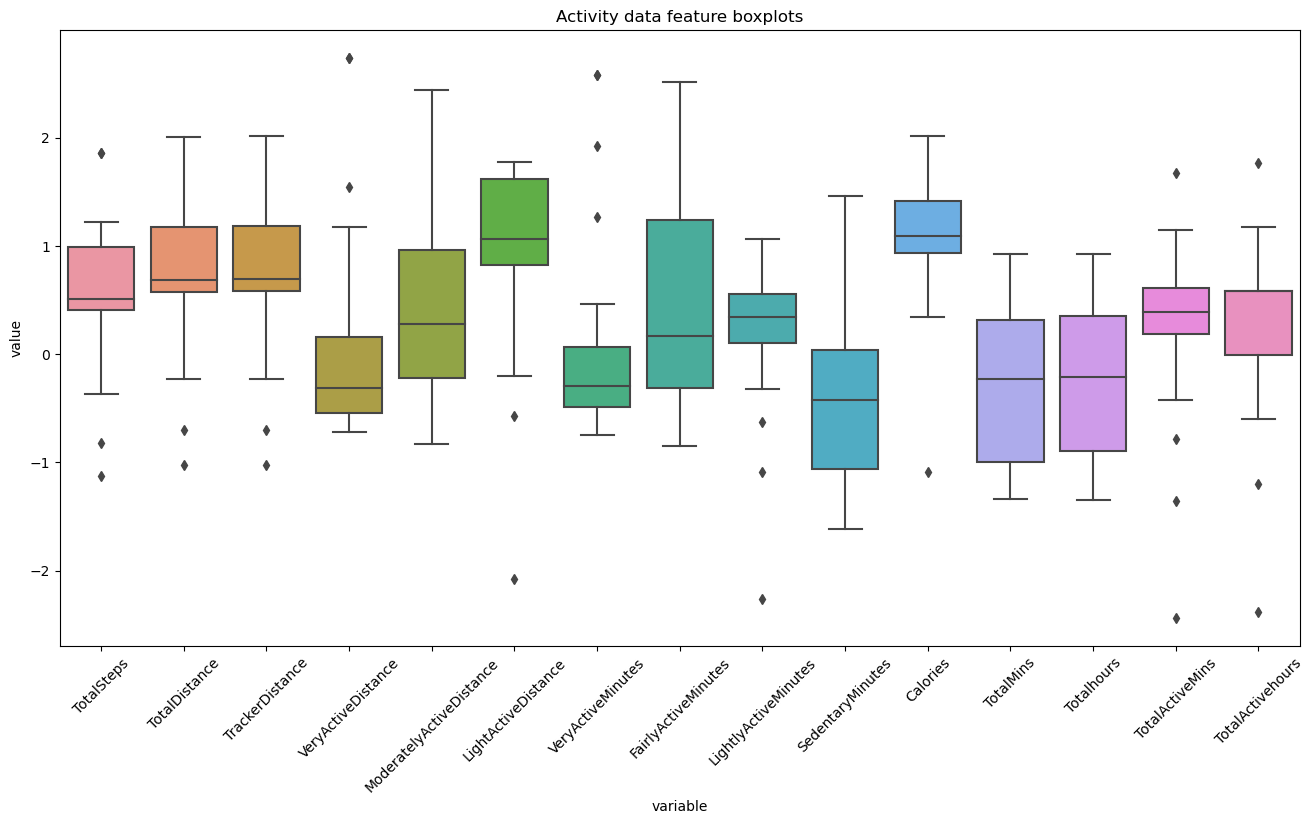

In [35]:
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x="variable", y="value", data=melted_desired_row)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(title='Activity data feature boxplots')

plt.show()

In [36]:
desired_row_df['ActivityPreference'].mode()

0    Light
Name: ActivityPreference, dtype: category
Categories (3, object): ['Light' < 'Moderate' < 'High']

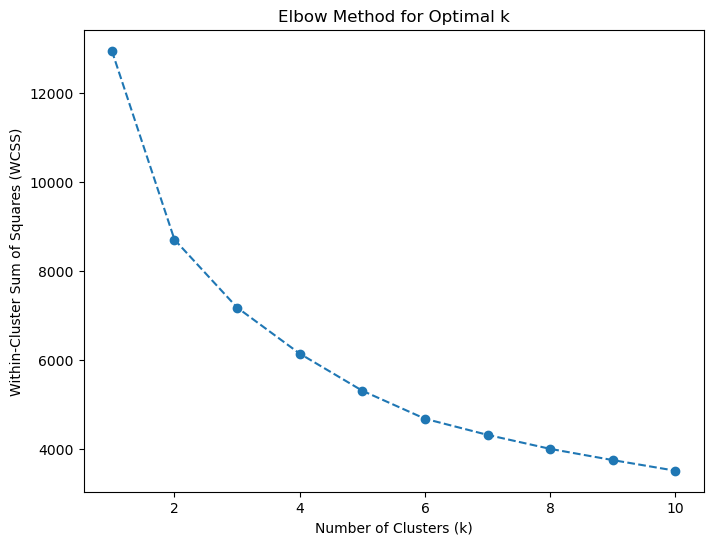

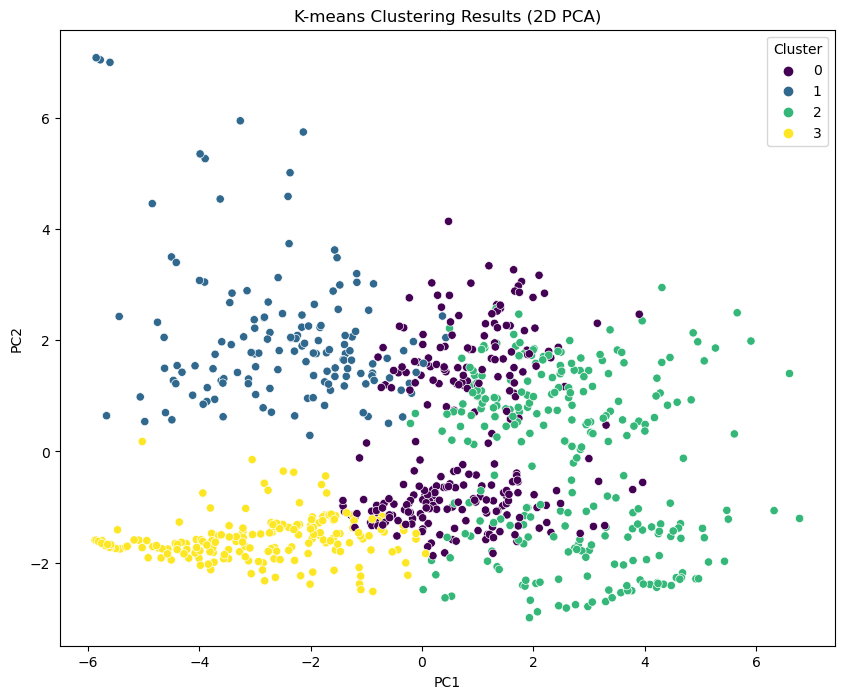

In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_act_scaled is your DataFrame
# Replace 'df_act_scaled' with your actual DataFrame name

# Extract numeric columns for clustering
numeric_columns = df_act_scaled.select_dtypes(include=np.number)

# Standardize the data using StandardScaler
scaler = StandardScaler()
df_act_scaled_standardized = scaler.fit_transform(numeric_columns)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_act_scaled_standardized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters (k)
optimal_k = 4

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_act_scaled['Cluster'] = kmeans.fit_predict(df_act_scaled_standardized)

# Reset index before creating the 'Cluster' column
df_act_scaled.reset_index(inplace=True)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_act_scaled_standardized), columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_act_scaled['Cluster']

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('K-means Clustering Results (2D PCA)')
plt.show()


In [38]:
# Print the column names in cluster_summary
df_pca

,PC1,PC2,Cluster
0,2.561963,1.166679,0
1,0.744298,1.191346,0
2,0.165347,-1.647376,0
3,0.947708,1.365421,2
4,1.348845,0.952186,2
...,...,...,...
858,1.210536,-1.490463,0
859,4.632415,-2.296573,2
860,1.284495,-1.548816,0
861,4.478347,-2.409407,2


In [39]:
df_act = df_act.reset_index(drop=True)
df_pca = df_pca.reset_index(drop=True)

# Add the 'Cluster' column from df_pca to df_act
df_act_scaled['Cluster'] = df_pca['Cluster']

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

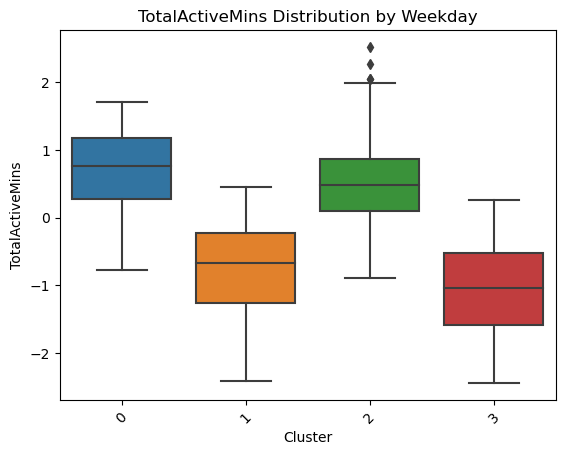

In [40]:
sns.boxplot(x='Cluster', y='TotalActiveMins', data=df_act_scaled)
plt.title('TotalActiveMins Distribution by Weekday')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

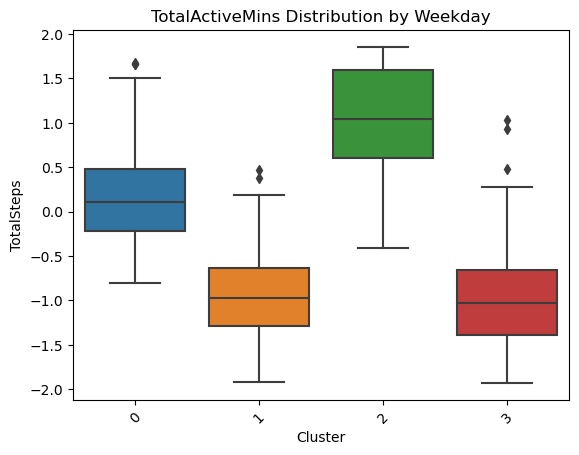

In [41]:
sns.boxplot(x='Cluster', y='TotalSteps', data=df_act_scaled)
plt.title('TotalActiveMins Distribution by Weekday')
plt.xticks(rotation=45)

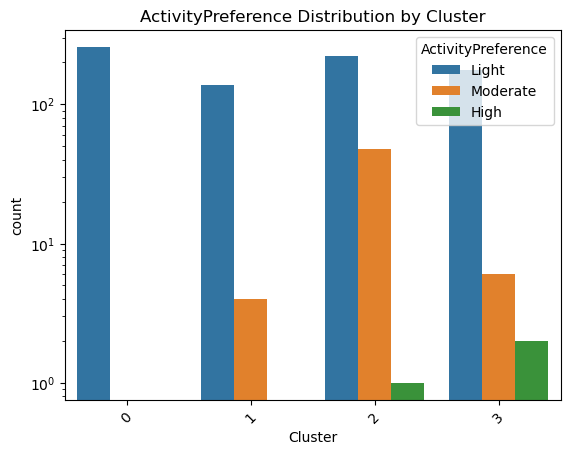

In [42]:
sns.countplot(x='Cluster', hue='ActivityPreference', data=df_act_scaled)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('ActivityPreference Distribution by Cluster')
plt.xticks(rotation=45)
plt.show()

In [43]:
df_act_scaled

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday,TotalMins,Totalhours,TotalActiveMins,TotalActivehours,ActivityPreference,Cluster
0,1503960366,2016-04-12,1.201932,0.878241,0.887298,0.226001,0.002741,1.437030,0.118786,-0.026026,1.307100,-0.815717,-0.542642,Tuesday,-0.387421,-0.441311,1.237182,1.172287,Light,0
1,1503960366,2016-04-13,0.624535,0.386101,0.392492,0.070229,0.215023,0.654432,-0.020026,0.354659,0.100042,-0.641725,-0.826548,Wednesday,-0.619517,-0.668821,0.142709,-0.011661,Light,0
2,1503960366,2016-04-14,0.559111,0.312120,0.318109,0.507397,-0.224704,0.190670,0.292300,-0.152921,-0.291436,0.960453,-0.858261,Thursday,0.929058,0.923748,-0.208728,-0.011661,Light,0
3,1503960366,2016-04-15,0.393053,0.164156,0.169344,0.356649,1.079312,-0.435408,0.257598,1.306371,0.013047,-0.822966,-0.905075,Friday,-0.752687,-0.668821,0.293324,0.580313,Light,2
4,1503960366,2016-04-16,1.084644,0.768877,0.777341,0.643069,-0.209541,0.845734,0.500518,-0.216368,0.143540,-0.652599,-0.726879,Saturday,-0.592883,-0.668821,0.243119,-0.011661,Light,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,8877689391,2016-05-08,0.612878,0.752794,0.761171,-0.175992,-0.527963,1.776156,-0.158837,-0.597053,0.404525,0.800960,0.759098,Sunday,0.929058,0.923748,0.233078,-0.011661,Light,0
859,8877689391,2016-05-09,1.856292,2.003730,2.018884,2.735445,0.381815,1.541376,1.784525,0.354659,0.100042,0.645092,2.015080,Monday,0.929058,0.923748,0.664843,0.580313,Light,2
860,8877689391,2016-05-10,0.624059,0.765660,0.774107,-0.040319,-0.133726,1.564565,-0.124134,-0.152921,0.176163,0.848083,0.736446,Tuesday,0.929058,0.923748,0.102544,-0.011661,Light,0
861,8877689391,2016-05-11,1.856292,2.003730,2.018884,2.735445,-0.209541,1.338481,2.305068,-0.089473,0.056544,0.630593,2.015080,Wednesday,0.929058,0.923748,0.705007,0.580313,Light,2


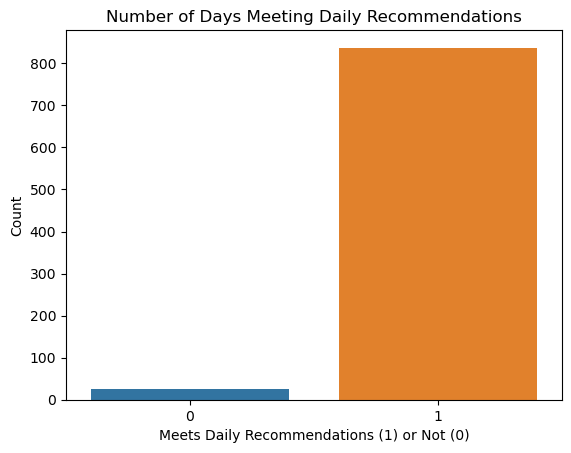

In [44]:
df_act['Meets_Daily_Requirements'] = (df_act['TotalActiveMins'] >= 20).astype(int)

# Create a bar plot
sns.countplot(x='Meets_Daily_Requirements', data=df_act)
plt.title('Number of Days Meeting Daily Recommendations')
plt.xlabel('Meets Daily Recommendations (1) or Not (0)')
plt.ylabel('Count')
plt.show()

In [45]:
daily_requirements_counts = df_act['Meets_Daily_Requirements'].value_counts()

# Print the values
print(daily_requirements_counts)

Meets_Daily_Requirements
1    837
0     26
Name: count, dtype: int64


In [46]:
failed_to_meet_daily_count = (df_act['Meets_Daily_Requirements'] == 0).sum()

# Print the total count
print(f'Total number of individuals who failed to meet daily recommendation: {failed_to_meet_daily_count}')

Total number of individuals who failed to meet daily recommendation: 26
